In [60]:
import numpy as np 
import matplotlib.pyplot as plt
import astropy.constants as c
from scipy.signal import find_peaks
from scipy.signal import peak_prominences
from scipy.signal import peak_widths
from scipy.optimize import curve_fit
import math
from statistics import stdev
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [ ]:
data=np.genfromtxt('Kypointsrange(0, 20)(2).txt', delimiter=' ')
extradata=np.genfromtxt('Kotherstuffrange(0, 20)(2).txt', delimiter=' ')

Stars = np.linspace(1, 50, 50)
GG=np.genfromtxt('Star Quiz data 50 stars 6 testers',delimiter=' ')
GG=np.array(GG)
Quizdata=GG.reshape((int(6),len(Stars)))
print(Quizdata.shape)

In [149]:
def most_frequent(List):
    List=list(List)
    return max(set(List), key = List.count)

In [150]:
mode = most_frequent(Quizdata[0])
print(mode)

1.0


In [151]:
maybe_stars=[]
yes_stars=[]

In [152]:
for n in Stars: 
    Q=most_frequent(Quizdata[:,int(n)-1])
    if Q==0:
        maybe_stars.append(n)
    if Q==2:
        yes_stars.append(n)
        
print(maybe_stars)
print(yes_stars)
        

[2.0, 5.0, 6.0, 7.0, 11.0, 14.0, 16.0, 26.0, 29.0, 30.0, 34.0, 44.0]
[1.0, 4.0, 8.0, 13.0, 15.0]


In [153]:
def bin_it(yvalues, xvalues, binsize):
    '''puts an array into averaged bins of a given size'''
    N=int(math.ceil(len(yvalues)/binsize))
    C=0
    newy=[]
    while C<N:
        if (C+1)*binsize<len(yvalues):
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
        newy.append(Q)
        C+=1
    y=np.array(newy)
    x=xvalues[0::binsize] 
    return y[0:len(y)-1], x[0:len(y)-1]

In [154]:
#Adds random noise
def addnoise(pure):
    vary = np.random.uniform(0, 1, pure.shape)
    signal = -(pure* np.log(vary))
    return signal

In [155]:
def gaus(x, height, centre, width):
    '''plots a gaussian acounting for granulation'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))

In [156]:
def findgran(x, y):
    #guess_vals=[np.max(y),y[round(len(y)/4)]]
    guess_vals=[0, 0]
    best_vals, covar =curve_fit(graneq, x, y, p0=guess_vals)
    return best_vals

In [157]:
def graneq(x,A,tau,SN):
    '''equation to describe the background'''
    return A/(1+(2*np.pi*x*tau)**4)+SN

In [158]:
def find_nearest(array, value):
    '''finds value closest to a given value in an array'''
    array = np.asarray(array)
    idx = (np.abs(array-value)).argmin()
    return idx

In [159]:
def f(x,a,b):
    return a*x+b
def f1(x,a,b,c):
    return a*np.exp(b*x)+c

In [160]:
binsize=5000
frequency = data[0]

In [164]:
binsize=5000

n = 15
SN = 18*10**(-0.4*(11.0-extradata[int(n)-1,2]))

y1,x1=data[int(n)],frequency
y2,x2=addnoise(data[int(n)]),frequency
y3,x3=bin_it(data[int(n)],frequency,binsize)
y,x=bin_it(addnoise(data[int(n)]),frequency,binsize)

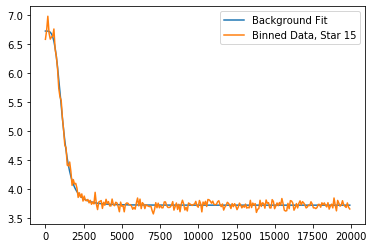

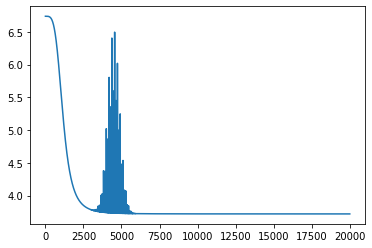

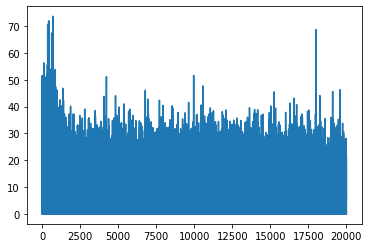

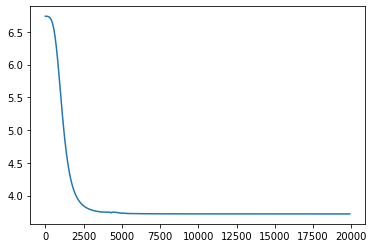

In [165]:
bv,covar = curve_fit(graneq,x,y,p0=[0,0,SN], bounds=([0,0,SN-SN/100],[np.inf,np.inf,SN+SN/100]))

background=graneq(x,bv[0],bv[1],bv[2])

plt.figure()
plt.plot(x, background, label='Background Fit')
plt.plot(x, y, label=f'Binned Data, Star {n}')
plt.legend()
plt.show()

plt.figure()
plt.plot(x1, y1)
plt.show()

plt.figure()
plt.plot(x2,y2)
plt.show()

plt.figure()
plt.plot(x3,y3)
plt.show()

In [32]:
%matplotlib qt

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
f = np.arange(0.0, 20000, 1) #x-axis
a0 = 2  #starting conditons for amplitude, centre and width
v0= 3000
sig0 = 50
delta_f = 5.0
s = a0*(np.exp(-0.5*((f-v0)**2/sig0**2))) #gaussian equation
l, = plt.plot(f, s, 'g', label='Gaussian Fit')
plt.plot(x, background, label='Background Fit')
plt.plot(x, y, label=f'Binned Data, Star {n}') 
plt.xlabel('Frequency ($\mu Hz$)')
plt.ylabel('Power ($ppm^2 \mu Hz^{-1}$)')
plt.legend()

ax.margins(x=0)
axcolor = 'lavender'
axcent = plt.axes([0.25, 0.02, 0.65, 0.03], facecolor=axcolor) #positions of the sliders
axamp = plt.axes([0.25, 0.07, 0.65, 0.03], facecolor=axcolor)
axsig = plt.axes([0.25, 0.12, 0.65, 0.03], facecolor=axcolor)

scentre = Slider(axcent, 'nu{max}', 0.1, 15000, valinit=v0, valstep=delta_f) #parameters for sliders
scentre.valtext.set_visible(False) #removing the values so that fitting isn't as biased
samp = Slider(axamp, 'Amp', 0.1, 4, valinit=a0)
samp.valtext.set_visible(False)
ssig = Slider(axsig, 'Sigma', 0.1, 5000, valinit=sig0, valstep= delta_f)
ssig.valtext.set_visible(False)

def update(val): #function to update the amp, cent and width values as the slider is moved
    amp = samp.val
    cent = scentre.val
    sig = ssig.val
    l.set_ydata(amp*(np.exp(-0.5*((f-cent)**2/(sig**2)))))
    fig.canvas.draw_idle()
scentre.on_changed(update)
samp.on_changed(update)
ssig.on_changed(update)

integrateax = plt.axes([0.025, 0.25, 0.1, 0.04]) #position of integrate button
button1 = Button(integrateax, 'Integrate', color=axcolor, hovercolor='0.975') #creation of integrate button

def integrand_b(x, a, b): #integrate under background curve
    I = a/(1+(2*np.pi*x*b)**4)
    return I
a = bv[0] #values for A and tau
b = bv[1]
Int_background = quad(integrand_b, 0, 6000, args=(a,b))

def integrand_g(x, a, b, c):
    I = a*np.exp((-(x-b)**2)/(2*c**2))
    return I 

gauss = []
gausserr = []
background = []
backgrounderr = []
def integrate(event): #defining what happens when 'integrate' button is clicked
    a = samp.val #values for a, b and c in integrand_g
    b = scentre.val
    c = ssig.val
    Int_gaus = quad(integrand_g, 0, 6000, args=(a,b,c))
    print(f'Power under Gaussian {Int_gaus}')
    print(f'Power under background {Int_background}')
    gauss.append(Int_gaus[0])
    gausserr.append(Int_gaus[1])
    background.append(Int_background[0])
    backgrounderr.append(Int_background[1])
button1.on_clicked(integrate)

resetax = plt.axes([0.025, 0.3, 0.1, 0.04]) #position of reset button
button2 = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975') #creating reset button
def reset(event): #defining what happens when 'integrate' button is clicked
    scentre.reset()
    samp.reset()
    ssig.reset()
button2.on_clicked(reset)

#rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor) #position of colour label
#radio = RadioButtons(rax, ('cyan', 'magenta', 'yellow'), active=0) #creation of colour label
#def colorfunc(label):
#    l.set_color(label)
#    fig.canvas.draw_idle()
#radio.on_clicked(colorfunc) #changes colour accordingly


plt.show()

ValueError: x and y must have same first dimension, but have shapes (210,) and (0,)